D:\OneDrive - Cardiff University\05 - Python\09 - Climate Change
D:
OneDrive - Cardiff University
D:\OneDrive - Cardiff University\


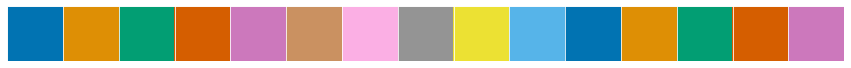

In [92]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys

%matplotlib inline

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
fig_format = "png"
dpi = 600
figsize = (12, 6.5)
figsize_map = (10, 10)
sns.palplot(sns.color_palette())
sns.set_style("darkgrid")

print(os.getcwd())
flag = False
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "OneDrive - Cardiff University":
        flag=True   
        break

if not flag:
    computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

In [93]:
path_save = computer_path + r"04 - Projects/14 - Growth project/Figures"

In [94]:
def get_df_comparison(sheet_name, electricity=False):
    df = pd.read_excel(path+os.path.sep+file, sheet_name = sheet_name, header=2, index_col=0)
    df.dropna(how='all', axis=1, inplace=True)
    df.dropna(how='all', axis=0, inplace=True)
    
    
    #change columns
    if electricity:
        cols = ['Oil', 'Natural Gas', 'Coal', 'Nuclear energy', 'Hydro electric', 'Renewables', 'Other', 'Total']
    else:
        cols = ['Oil', 'Natural Gas', 'Coal', 'Nuclear energy', 'Hydro electric', 'Renewables', 'Total']
    tuples_2017 = [("2017", x) for x in cols]
    tuples_2018 = [("2018", x) for x in cols]
    multi_idx = tuples_2017 + tuples_2018
    multi_idx
    df.columns = pd.MultiIndex.from_tuples(multi_idx)
    return df

def get_df(sheet_name, header=2, index_col=0):
    
    df = pd.read_excel(path+os.path.sep+file, sheet_name = sheet_name, header=header, index_col=index_col)
    df.dropna(how='all', axis=1, inplace=True)
    df.dropna(how='all', axis=0, inplace=True)
    
    cols = [x for x in df.columns if isinstance(x, int)]
    df = df[cols]
    
    df.index = df.index.str.strip()
    return df

# Population data
https://data.worldbank.org/indicator/SP.POP.TOTL

In [95]:
path = computer_path + r"04 - Projects/14 - Growth project/population-world bank"

file = "Population.csv"

In [96]:
pop_df = pd.read_csv(path+os.path.sep+file, encoding="cp1252", index_col=0)
pop_df = pop_df.loc['World', "1960":"2017"].reset_index()
pop_df.columns = ["year", "Population"]
pop_df["year"] = pop_df["year"].astype(int)
pop_df.set_index("year", drop=True, inplace=True)
pop_df.head()

,Population
year,
1960,3.03225e+09
1961,3.07341e+09
1962,3.12652e+09
1963,3.19178e+09
1964,3.25744e+09


# GDP data
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [97]:
path = computer_path + r"04 - Projects/14 - Growth project/world gdp-world bank"
file = "GDP_world.csv"

In [98]:
gdp_df = pd.read_csv(path+os.path.sep+file, encoding="cp1252", index_col=0)
gdp_df = gdp_df.loc['World', "1960":"2017"].reset_index()
gdp_df.columns = ["year", "GDP"]
gdp_df["year"] = gdp_df["year"].astype(int)
gdp_df.set_index("year", drop=True, inplace=True)
gdp_df.head()

,GDP
year,
1960,1.37e+12
1961,1.43e+12
1962,1.53e+12
1963,1.65e+12
1964,1.81e+12


In [99]:
path = computer_path + r"04 - Projects/14 - Growth project"
file = "bp-stats-review-2019-all-data.xlsx"

## Oil price
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [100]:
sheet_name = "Oil - Crude prices since 1861"
oil_price = pd.read_excel(path+os.path.sep+file, sheet_name = sheet_name, header=3, index_col=0)
oil_price.dropna(axis=1, how="all", inplace=True)
oil_price.dropna(axis=0, how="all", inplace=True)
oil_price.head()

,$ money of the day,$ 2018
Year,,
1861,0.49,13.638884
1862,1.05,26.303562
1863,3.15,63.981638
1864,8.06,128.879461
1865,6.59,107.664892


## Electricity generation
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [101]:
electricity_gen = get_df_comparison("Elec Gen by fuel", electricity=True)
electricity_gen.head()

2017                                           \
                           Oil  Natural Gas         Coal Nuclear energy   
Terawatt-hours                                                            
Canada                3.212473    59.605269    60.131935     100.408995   
Mexico               38.904020   196.320460    30.861010      10.882862   
US                   22.999955  1393.994292  1310.004561     847.315405   
Total North America  65.116448  1649.920021  1400.997507     958.607262   
Argentina            11.611393    80.795808     2.032082       6.088000   

                                                                        \
                    Hydro electric  Renewables      Other        Total   
Terawatt-hours                                                           
Canada                  396.502347   42.082832   0.787559   662.731411   
Mexico                   31.847656   19.130738   1.138609   329.085355   
US                      296.806675  417.757771  13.656467  4302.535126   
Total North America     725.156678  478.971341  15.582635  5294.351892   
Argentina                41.542979    3.011639   0.536554   145.618454   

                          2018                                           \
                           Oil  Natural Gas         Coal Nuclear energy   
Terawatt-hours                                                            
Canada                3.165935    58.741767    59.260807     100.039205   
Mexico               36.753647   196.653829    29.207574      13.588580   
US                   26.421312  1578.508171  1245.789138     849.555536   
Total North America  66.340894  1833.903767  1334.257519     963.183321   
Argentina             6.413229    85.274928     2.043583       6.872603   

                                                                        
                    Hydro electric  Renewables      Other        Total  
Terawatt-hours                                                          
Canada                  387.250876   45.304938   0.586627   654.350156  
Mexico                   32.395115   21.352291   2.188988   332.140023  
US                      288.706340  458.524325  13.266464  4460.771285  
Total North America     708.352331  525.181553  16.042079  5447.261464  
Argentina                41.649455    3.817768   0.537842   146.609407

In [102]:
total_idx = [x for x in electricity_gen.index if "Total" in x]
total_idx.remove("Total World")
total_idx

['Total North America',
 'Total S. & Cent. America',
 'Total Europe',
 'Total CIS',
 'Total Middle East',
 'Total Africa',
 'Total Asia Pacific']

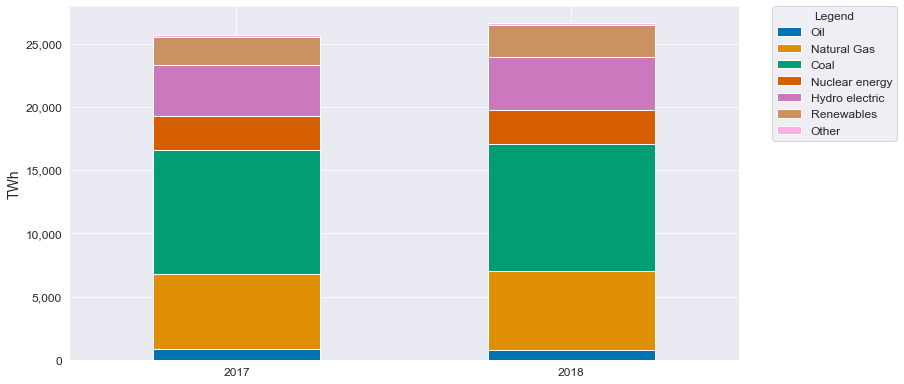

In [103]:
# Comparison between 2017 and 2018
idx = pd.IndexSlice

f, ax = plt.subplots(figsize=figsize)
cols_to_plot = ['Oil', 'Natural Gas', 'Coal', 'Nuclear energy', 'Hydro electric', 'Renewables', 'Other']
total_df = electricity_gen.loc["Total World",  idx[:, cols_to_plot]].unstack()
total_df.plot.bar(stacked=True, ax=ax, rot=0)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel("TWh")
# ax.margins(0, 0)
lgd = ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

f.savefig(path_save+os.path.sep+"2017_2018_elec."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [104]:
## Share of each fuel in the total consumption
# dominated by fossil fuels (66%), hydro (16%), Nuclear (10%), RE (9%)
df_2018 = electricity_gen.loc["Total World",  idx["2018", cols_to_plot]]/electricity_gen.loc["Total World",  idx["2018", cols_to_plot]].sum()
df_2018.to_csv(path_save+os.path.sep+"2018_elec.csv", header=False)
df_2018

2018  Oil               0.030163
      Natural Gas       0.232305
      Coal              0.379508
      Nuclear energy    0.101501
      Hydro electric    0.157548
      Renewables        0.093196
      Other             0.005780
Name: Total World, dtype: float64

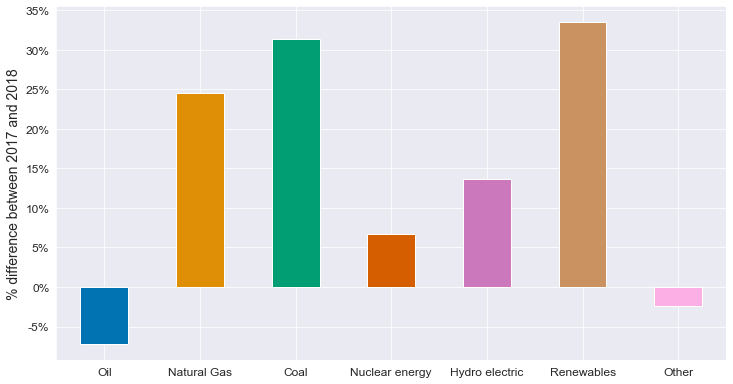

In [105]:
# How is the increase of electricity consumption covered between 2017 and 2018? 
# Fossil fuels > RE > Hydro > Nuclear
# We currently cannot cover the increase of consumption without fossil fuel

f, ax = plt.subplots(figsize=figsize)

ax.xaxis.grid(False)
total_df.loc["Difference", :] = (total_df.loc["2018", :]-total_df.loc["2017", :])
total_df.loc["Difference", :] = total_df.loc["Difference", :]/total_df.loc["Difference", :].sum()

total_df.loc["Difference", :].plot.bar(ax=ax, rot=0, color=sns.color_palette())
ax.set_ylabel("% difference between 2017 and 2018")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))
f.savefig(path_save+os.path.sep+"2017_2018_elec_diff."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Primary energy
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [106]:
primary_energy = get_df_comparison("Primary Energy - Cons by fuel")
# primary_energy

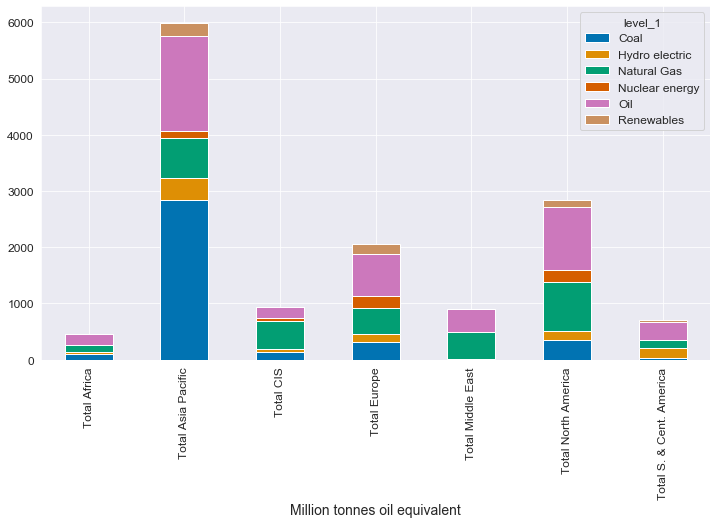

In [107]:
idx = pd.IndexSlice

f, ax = plt.subplots(figsize=figsize)
total_df = primary_energy.loc[total_idx,  idx["2018", cols_to_plot]].unstack().reset_index()
# total_df.plot.bar(stacked=True, ax=ax, rot=0)
total_df = total_df.groupby(["Million tonnes oil equivalent", "level_1"]).sum().unstack(1)#.plot.bar(stacked=True)
total_df.columns = total_df.columns.get_level_values(1)
total_df.plot.bar(stacked=True, ax=ax)

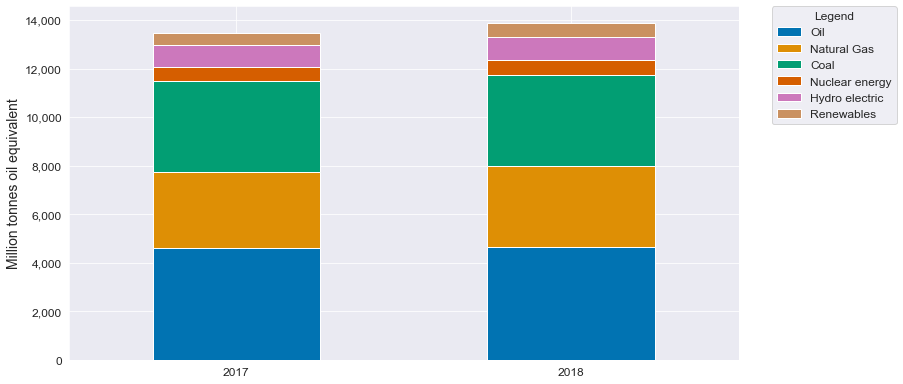

In [108]:
# Comparison between 2017 and 2018

idx = pd.IndexSlice

f, ax = plt.subplots(figsize=figsize)
cols_to_plot = ['Oil', 'Natural Gas', 'Coal', 'Nuclear energy', 'Hydro electric', 'Renewables']
total_df = primary_energy.loc["Total World",  idx[:, cols_to_plot]].unstack()
total_df.plot.bar(stacked=True, ax=ax, rot=0)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel("Million tonnes oil equivalent")
# ax.margins(0, 0)
lgd = ax.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.savefig(path_save+os.path.sep+"2017_2018_primary."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [109]:
## Share of each fuel in the total consumption
# dominated by fossil fuels (85%), hydro (7%), Nuclear (4%), RE (4%)
df_2018 = primary_energy.loc["Total World",  idx["2018", cols_to_plot]]/primary_energy.loc["Total World",  idx["2018", cols_to_plot]].sum()
df_2018.to_csv(path_save+os.path.sep+"2018_primary.csv", header=False)
df_2018

2018  Oil               0.336249
      Natural Gas       0.238691
      Coal              0.272061
      Nuclear energy    0.044087
      Hydro electric    0.068432
      Renewables        0.040480
Name: Total World, dtype: float64

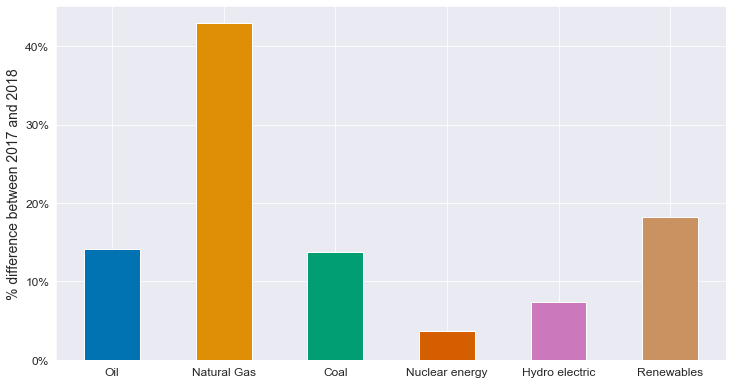

In [110]:
f, ax = plt.subplots(figsize=figsize)

total_df.loc["Difference", :] = (total_df.loc["2018", :]-total_df.loc["2017", :])
total_df.loc["Difference", :] = total_df.loc["Difference", :]/total_df.loc["Difference", :].sum()

total_df.loc["Difference", :].plot.bar(ax=ax, rot=0, color=sns.color_palette())
ax.set_ylabel("% difference between 2017 and 2018")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))
f.savefig(path_save+os.path.sep+"2017_2018_primary_diff."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [111]:
## Primary energy per year

In [112]:
prim_cons_df = get_df("Primary Energy Consumption")
prim_cons_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,
Canada,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,187.556717,...,304.885433,311.964130,327.203681,324.724983,337.019816,341.813863,339.043046,338.223484,343.696739,344.424157
Mexico,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,47.492627,...,169.543061,174.578146,183.054676,184.181945,185.033923,184.141764,183.970404,186.358373,189.300608,186.913820
US,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,1716.951707,...,2148.679835,2223.278289,2204.148602,2148.453583,2208.025392,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296
Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,...,2623.108329,2709.820564,2714.406958,2657.360511,2730.079131,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273
Argentina,26.914442,27.809713,28.635373,29.623572,30.644712,28.937326,30.747979,31.299226,32.626256,34.004124,...,73.284787,77.182535,78.724688,81.019815,84.488737,84.127455,86.098900,85.917292,86.103674,85.052439


Text(0, 0.5, 'Mtoe')

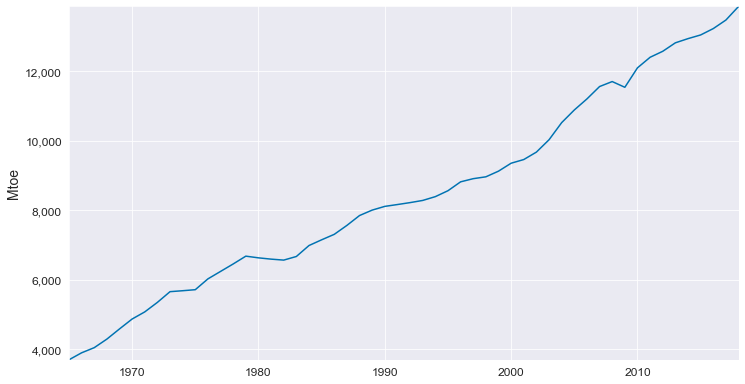

In [113]:
f, ax = plt.subplots(figsize=figsize)

prim_cons_df.loc["Total World", :].T.plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Mtoe")

## Gas
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [114]:
gas_cons_df = get_df("Gas Consumption - Mtoe")
gas_cons_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,
Canada,18.631490,20.397669,21.660980,24.120445,26.955832,29.779753,31.785490,35.751920,38.020557,38.433334,...,74.433491,75.907911,83.861737,83.585490,89.650752,94.232803,94.370636,91.028117,94.324807,99.516040
Mexico,6.934384,7.318437,6.293767,6.757703,8.380957,8.570509,8.907524,9.525337,10.554251,11.104646,...,56.035083,56.788083,60.884343,63.330843,66.891717,67.797461,69.460805,71.392981,74.285175,76.950748
US,357.627352,385.447646,406.980946,435.667670,468.968788,494.295640,509.589527,514.786290,510.572621,492.884537,...,531.064586,557.346045,565.959424,591.679087,607.930213,621.032206,639.363280,644.109149,635.805709,702.588114
Total North America,383.193226,413.163751,434.935693,466.545818,504.305578,532.645902,550.282542,560.063547,559.147429,542.422517,...,661.533160,690.042039,710.705504,738.595420,764.472682,783.062470,803.194721,806.530246,804.415691,879.054901
Argentina,3.545486,3.839828,4.015430,4.471159,4.454435,5.033921,5.434460,6.098403,6.939620,7.345176,...,35.972105,36.188664,37.695433,39.264152,39.576689,39.686138,40.113988,41.453148,41.530549,41.878108


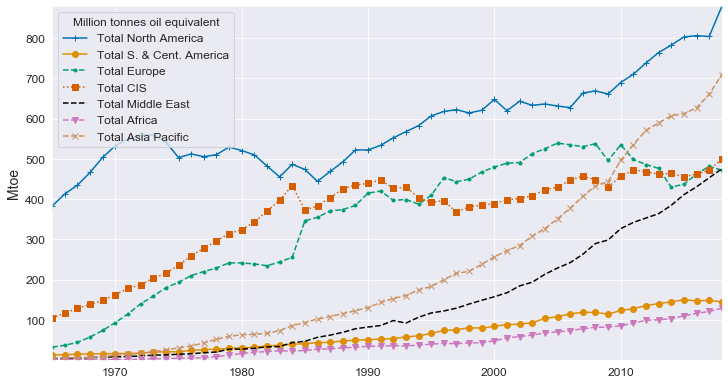

In [115]:
# Gas consumption by region 

f, ax = plt.subplots(figsize=figsize)

gas_cons_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Mtoe")
f.savefig(path_save+os.path.sep+"gas_consumption."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

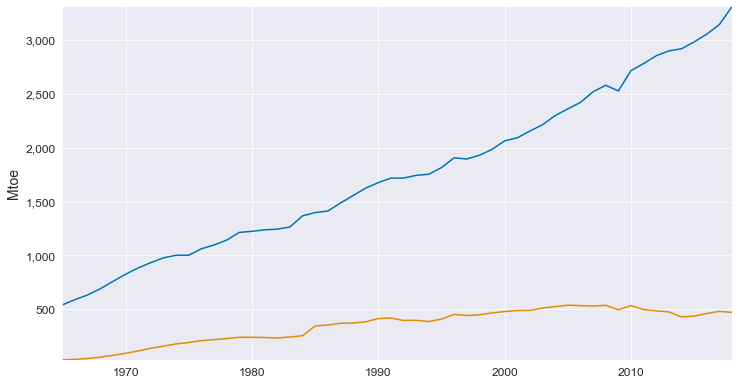

In [116]:
# Comparison of consumption in the world and in Europe
# Europe is struggling to increase its gas consumption since 2008, maybe because of economic difficulties? or maybe because of limited access to energy?
f, ax = plt.subplots(figsize=figsize)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
gas_cons_df.loc['Total World', :].T.plot(ax=ax)
gas_cons_df.loc['Total Europe', :].T.plot(ax=ax)
ax.set_ylabel("Mtoe")
ax.margins(0, 0)

In [117]:
gas_prod_df = get_df("Gas Production - Mtoe")
gas_prod_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,
Canada,46.445636,50.778160,57.330181,61.425193,60.150825,61.441574,61.982115,65.110705,62.833878,66.257309,...,133.319712,128.625172,129.897958,129.239209,130.627988,136.708169,138.225000,147.725064,152.667433,158.832426
Mexico,9.484357,9.387939,9.757543,10.602402,11.114534,11.297536,11.079529,11.750023,14.708396,17.855086,...,45.213286,44.005002,44.797069,43.723291,45.131590,44.109891,41.226954,37.533469,32.904939,32.127716
US,491.369130,505.297160,503.658648,503.200611,481.037997,445.435486,441.806203,443.734016,441.917333,455.323891,...,479.434661,494.546386,530.832800,558.146885,563.794269,605.955703,636.546176,625.413681,641.236866,715.201225
Total North America,547.299123,565.463259,570.746372,575.228207,552.303356,518.174596,514.867848,520.594744,519.459607,539.436286,...,657.967659,667.176560,705.527827,731.109385,739.553847,786.773762,815.998130,810.672215,826.809238,906.161367
Argentina,5.033921,5.439896,5.171058,5.630967,6.060774,6.432046,6.132687,6.330030,6.530718,6.045722,...,34.652787,33.531381,32.431509,31.548756,29.712686,29.652519,30.516891,32.057056,31.943154,33.899733


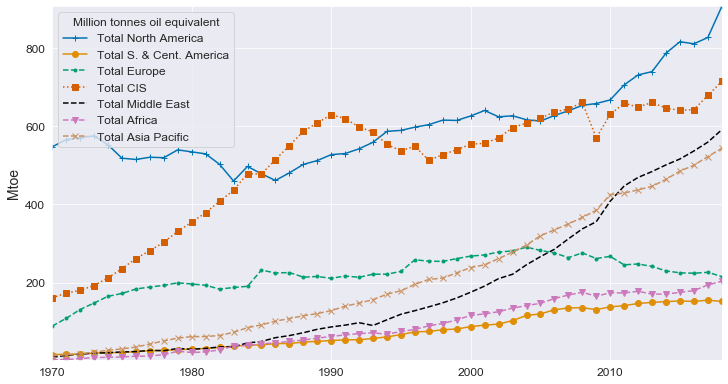

In [118]:
# Gas production by region
# In Europe the production is decreasing since ~2005


f, ax = plt.subplots(figsize=figsize)

gas_prod_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Mtoe")
f.savefig(path_save+os.path.sep+"gas_production."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

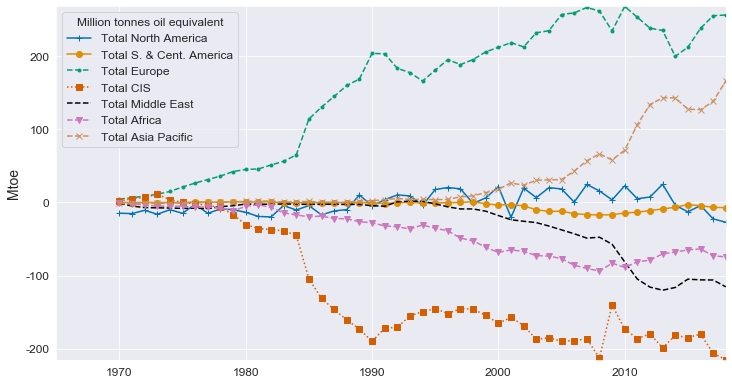

In [119]:
# Net Import (positive values) Export(negative values) by region
# Europe is a net importer of gas mainly from Russia (CIS) + Middle east
# Asia is also a net importer of gas also from Russia + Middle east
# In the future, will Russia prefer to sell its gas to Europe or Asia? 

f, ax = plt.subplots(figsize=figsize)

(gas_cons_df.loc[total_idx, :]-gas_prod_df.loc[total_idx, :]).T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Mtoe")
f.savefig(path_save+os.path.sep+"gas_import_export."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [120]:
gas_reserves_df = get_df("Gas - Proved reserves history ")
gas_reserves_df.head()
gas_reserves_df=gas_reserves_df

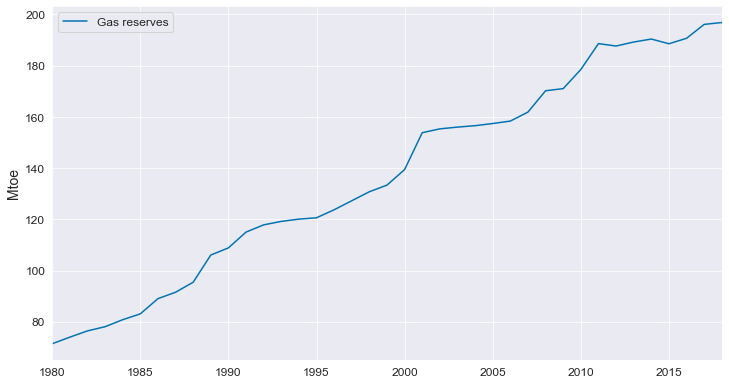

In [121]:
#Gas reserve

f, ax = plt.subplots(figsize=figsize)

# gas_reserves_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
gas_reserves_df.loc["Total World", :].T.plot(ax=ax, label="Gas reserves")
# gas_prod_df.loc["Total World", :].cumsum().plot(ax=ax, label="Cumulative gas production")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)
ax.set_ylabel("Mtoe")
ax.legend()

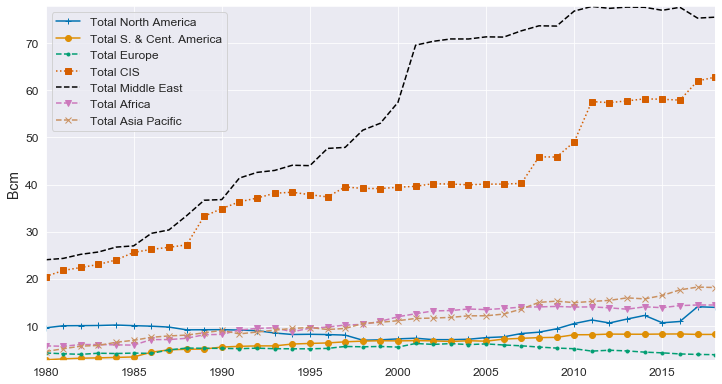

In [122]:
#gas reserve by region
#Most reserves are in Russia and Middle east
# It seems to have plateau in middle east e.g. no new gas fields are being discovered

f, ax = plt.subplots(figsize=figsize)

gas_reserves_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Bcm")
ax.legend()

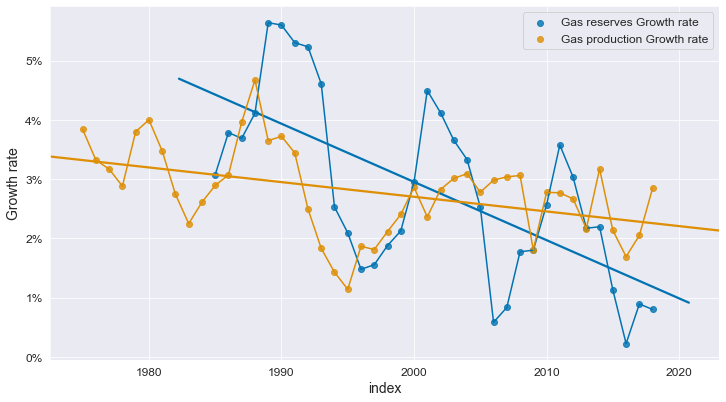

In [123]:
# Growth rate on a 5 years average moving window
# When the growth rate goes below 0 for production the peak will have be reached. 
# We are discovering less and less reserves
# The production growth rate is also decreasing

frames = {}

val = ((gas_reserves_df.loc["Total World", :]-gas_reserves_df.loc["Total World", :].shift())/gas_reserves_df.loc["Total World", :].shift()).rolling(window=5).mean()
frames["Gas reserves Growth rate"] = val.reset_index()

val = ((gas_prod_df.loc["Total World", :]-gas_prod_df.loc["Total World", :].shift())/gas_prod_df.loc["Total World", :].shift()).rolling(window=5).mean()
frames["Gas production Growth rate"] = val.reset_index()

f, ax = plt.subplots(figsize=figsize)
max_length = 0
count = 0
for i, v in frames.items():
    x = list(frames[i].dropna()['index'].values)
    y = list(frames[i].dropna()["Total World"].values)
    sns.regplot(x='index', y="Total World", data=frames[i], label=i, ci=None)
    ax.plot(x, y, color=sns.color_palette()[count])
    count = count + 1

ax.set_ylabel("Growth rate")

ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))

ax.legend()
ax.margins(0, None)
f.savefig(path_save+os.path.sep+"gas_growth_rate."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Coal
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [124]:
coal_cons_df = get_df("Coal Consumption - Mtoe")
coal_cons_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,
Canada,15.476000,15.172000,15.032000,16.331000,15.767000,16.928000,16.090000,15.183000,15.637000,15.888000,...,23.485383,24.765573,22.182526,21.078771,20.767676,19.628894,19.886749,18.681210,18.614241,14.420876
Mexico,0.689787,0.735765,0.902790,0.946379,0.959325,1.075881,1.350697,1.492835,1.600387,1.768057,...,10.296341,12.735920,14.731474,12.834567,12.745194,12.720451,12.695654,12.436226,15.198004,11.902586
US,277.235092,290.700445,285.210377,295.191442,296.409082,293.607861,277.661289,289.116530,310.532247,303.144200,...,471.399518,498.756804,470.599433,416.027924,431.837610,430.856063,372.233686,340.562437,331.263340,317.009775
Total North America,293.400879,306.608210,301.145167,312.468821,313.135406,311.611743,295.101986,305.792364,327.769634,320.800257,...,505.181242,536.258297,507.513433,449.941262,465.350481,463.205408,404.816089,371.679873,365.075585,343.333237
Argentina,0.727003,0.599468,0.674153,0.655119,0.784365,1.007962,0.883710,0.743877,0.816554,1.016846,...,0.827252,1.158390,1.256977,1.175338,1.284549,1.366442,1.359770,1.048035,1.076981,1.217355


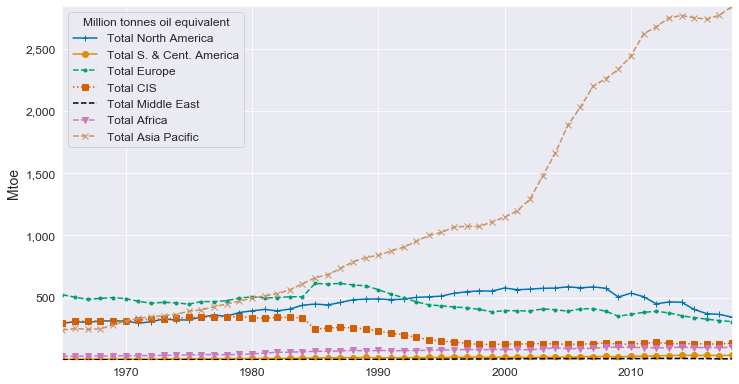

In [125]:
# Coal consumption by region
# Coal is mainly consumed in Asia (China)
f, ax = plt.subplots(figsize=figsize)

coal_cons_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)
ax.set_ylabel("Mtoe")
f.savefig(path_save+os.path.sep+"coal_consumption."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [126]:
coal_prod_df = get_df("Coal Production - Mtoe")
coal_prod_df.head()

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,
Canada,23.157114,24.560023,25.461237,33.352445,35.519537,33.011322,33.293590,38.554385,41.043279,39.961333,...,33.145030,35.426390,35.464340,35.530023,36.139820,35.909597,32.357887,32.726020,31.847760,28.569114
Mexico,1.699269,2.043255,2.594726,2.827004,2.900545,3.141468,3.486792,3.113046,3.344392,3.385808,...,6.082651,7.320334,9.369502,7.423459,7.162443,7.254462,6.871276,6.070630,7.362186,7.709892
US,439.932538,446.204714,412.878352,472.070092,462.636683,467.048764,482.169922,496.450731,511.004161,537.599235,...,513.712533,523.677701,528.302141,491.903829,475.825274,482.310643,426.871230,348.334010,371.340317,364.451143
Total North America,464.788921,472.807992,440.934316,508.249541,501.056764,503.201554,518.950304,538.118161,555.391833,580.946376,...,552.940214,566.424425,573.135983,534.857311,519.127538,525.474702,466.100392,387.130660,410.550263,400.730148
Brazil,2.901467,3.198198,3.412208,3.829681,3.908328,3.706083,3.376172,3.677839,3.319302,1.687078,...,2.620332,2.319191,2.419325,2.572516,3.333820,3.264490,2.566929,2.367243,1.875037,1.174148


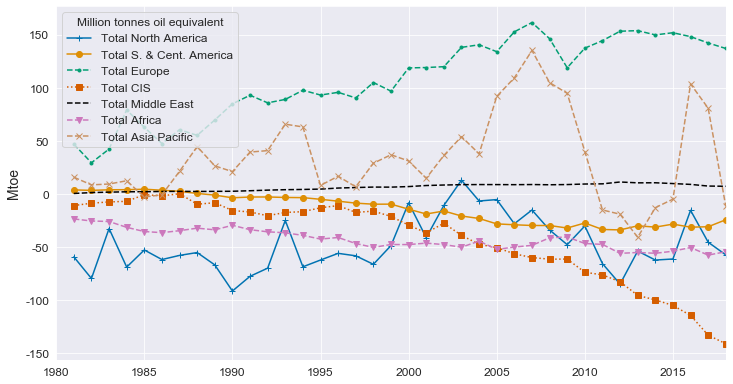

In [127]:
# Coal import and export
# Coal is mainly a domestic energy; it is produced where it is consumed
# The amount of coal exchange between regions is much lower than for gas
# Europe is also the main importer of coal

f, ax = plt.subplots(figsize=figsize)

(coal_cons_df.loc[total_idx, :]-coal_prod_df.loc[total_idx, :]).T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)
ax.set_ylabel("Mtoe")
ax.set_xlim(1980, None)
f.savefig(path_save+os.path.sep+"coal_import_export."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## OIL
https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

In [128]:
oil_reserves_df = get_df("Oil - Proved reserves history")
oil_reserves_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand million barrels,,,,,,,,,,,,,,,,,,,,,
Canada,39.527523,40.175336,40.312095,40.491260,40.531767,40.939038,41.102001,41.201261,41.46776,41.295702,...,175.015217,174.848021,174.176873,173.716100,173.037537,172.155995,171.512308,170.501364,168.878273,167.815101
Mexico,47.224000,56.998000,56.998000,57.096000,56.410000,55.593000,54.880000,54.110000,53.01200,51.983000,...,11.865500,11.691300,11.393700,11.423900,11.078800,10.816400,7.976500,7.218900,7.694700,7.694700
US,36.533000,36.494000,35.079000,35.636000,36.089000,36.360000,35.054000,35.403000,35.06300,34.270000,...,30.872000,34.990000,39.775000,44.180000,48.463000,54.962000,47.987000,49.966000,61.233000,61.233000
Total North America,123.284523,133.667336,132.389095,133.223260,133.030767,132.892038,131.036001,130.714261,129.54276,127.548702,...,217.752717,221.529321,225.345573,229.320000,232.579337,237.934395,227.475808,227.686264,237.805973,236.742801
Argentina,2.457000,2.171652,1.949600,2.449769,2.349000,2.240000,2.233000,2.246000,2.27990,2.167700,...,2.511496,2.524152,2.525000,2.354209,2.329584,2.379709,2.394724,2.162209,2.016765,2.016765


In [129]:
OPEC_countries = ["Iran", 
                  "Iraq", 
                  "Kuwait", 
                  "Saudi Arabia", 
                  "Venezuela", 
                  "Qatar", 
                  "Indonesia", 
                  "Libya", 
                  "United Arab Emirates",
                  "Algeria",
                  "Nigeria",
                  "Ecuador",
                  "Gabon",
                  "Angola",
                  "Equatorial Guinea",
                  "Republic of Congo"
                 ]
len(OPEC_countries)

16

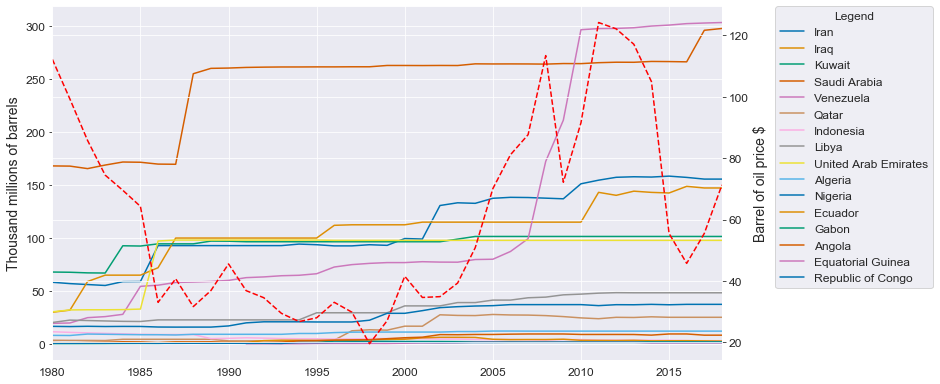

In [130]:
# Declared reserves for each of the country of the OPEC plotted against the price of the oil barrel
# When the price of oil is low, it forces OPEC country to declare higher amount of reserves to be able to increase their export. 
# these reserves are virtual and do not really exist. 
# Venezuela reserves are proven but very hard to extract

f, ax = plt.subplots(figsize=figsize)
ax2 = ax.twinx()

x=oil_reserves_df.columns.values
y= oil_price["$ 2018"].values[-len(x):]

ax2.plot(x, y, color='red', linestyle='--')
ax.set_ylabel("Thousand millions of barrels")
ax2.set_ylabel("Barrel of oil price $")
oil_reserves_df.loc[OPEC_countries, :].T.plot(ax=ax)
lgd = ax.legend(title="Legend", bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)
ax.margins(0, None)
f.savefig(path_save+os.path.sep+"oil_reserves_OPEC."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

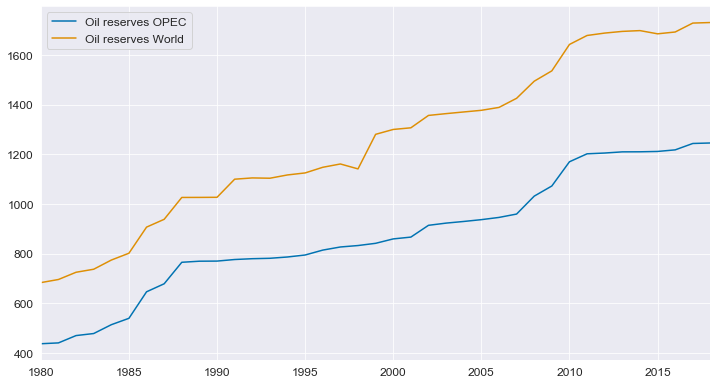

In [131]:
# 70% of the total reserve are uncertained 

f, ax = plt.subplots(figsize=figsize)

oil_reserves_df.loc[OPEC_countries, :].sum().plot(ax=ax, label="Oil reserves OPEC")

oil_reserves_df.loc["Total World",:].plot(ax=ax, label="Oil reserves World")
ax.margins(0,None)
ax.legend()

In [132]:
oil_prod_df = get_df("Oil Production - Barrels")
oil_prod_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
Canada,920.000000,1012.00000,1106.000000,1194.00000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,1993.000000,...,3202.397689,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4388.135578,4450.796497,4798.189605,5208.366395
Mexico,362.000000,370.00000,411.000000,439.00000,461.000000,487.000000,486.000000,506.000000,525.000000,653.000000,...,2978.494802,2959.366480,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,2068.371143
US,9014.148000,9579.24100,10219.252000,10599.74300,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,10461.205000,...,7259.106959,7551.781110,7870.379589,8909.662541,10072.733000,11773.175342,12772.915014,12339.915169,13134.738658,15310.691233
Total North America,10296.148000,10961.24100,11736.252000,12232.74300,12594.674000,13256.849000,13223.778000,13519.896000,13584.953000,13107.205000,...,13439.999449,13843.227390,14325.515035,15560.998199,16947.896696,18827.906124,19747.591439,19246.511164,20157.078422,22587.428771
Argentina,275.673973,292.86411,318.631233,348.15847,361.532055,399.464658,431.538082,444.115847,433.635616,423.387397,...,729.694854,711.840091,667.236399,656.733072,644.847580,638.019797,646.847020,610.104078,590.548947,591.808071


In [133]:
oil_prod_df=oil_prod_df*365/1000000
oil_prod_df.loc["CumSum", :] = oil_prod_df.loc["Total World",:].cumsum()

In [134]:
oil_prod_df.loc[["CumSum", "Total World"], :]

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
CumSum,11.604028,24.218749,37.761567,52.514228,68.445971,85.993267,104.529881,124.077042,145.448448,166.863377,...,1035.833193,1066.221321,1096.884509,1128.357869,1159.983969,1192.372585,1225.787130,1259.302054,1293.065130,1327.637378
Total World,11.604028,12.614721,13.542818,14.752661,15.931743,17.547296,18.536614,19.547161,21.371406,21.414929,...,29.714714,30.388128,30.663188,31.473360,31.626101,32.388616,33.414545,33.514925,33.763076,34.572247


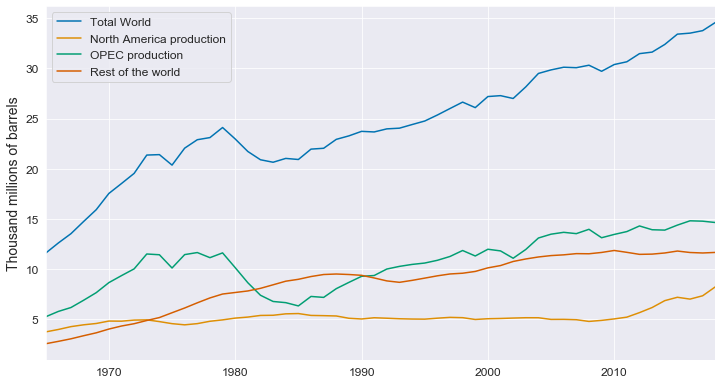

In [135]:
# Oil production by region
# in most regions the oil production is plateauin. THe production is mainly driven by the shale oil production of the US.

f, ax = plt.subplots(figsize=figsize)
oil_prod_df.loc['Total World', :].plot(ax=ax, label="Total World")
oil_prod_df.loc['Total North America', :].plot(ax=ax, label="North America production")
oil_prod_df.loc[OPEC_countries, :].sum().plot(ax=ax, label="OPEC production")
rest_of_the_world = ['Total S. & Cent. America', 
                 'Total Europe', 
                 'Total CIS', 
                 'Total Middle East',
                 'Total Africa',
                 'Total Asia Pacific']
(oil_prod_df.loc[rest_of_the_world, :].sum()-oil_prod_df.loc[OPEC_countries, :].sum()).plot(ax=ax, label="Rest of the world")
ax.set_ylabel("Thousand millions of barrels")
ax.legend()
ax.margins(0, None)
f.savefig(path_save+os.path.sep+"oil_production."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

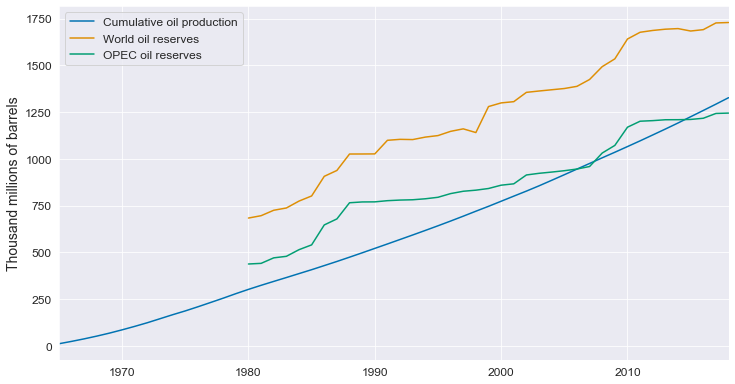

In [136]:
f, ax = plt.subplots(figsize=figsize)
oil_prod_df.loc["CumSum", :].plot(ax=ax, label="Cumulative oil production")

# oil_prod_df.loc['Total North America', :].cumsum().plot(ax=ax, label="North America production")
# oil_prod_df.loc[OPEC_countries, :].sum().cumsum().plot(ax=ax, label="OPEC production")
# rest_of_the_world = ['Total S. & Cent. America', 
#                  'Total Europe', 
#                  'Total CIS', 
#                  'Total Middle East',
#                  'Total Africa',
#                  'Total Asia Pacific']
# (oil_prod_df.loc[rest_of_the_world, :].sum().cumsum()-oil_prod_df.loc[OPEC_countries, :].sum().cumsum()).plot(ax=ax, label="Rest of the world")



oil_reserves_df.loc["Total World",:].plot(ax=ax, label="World oil reserves ")
oil_reserves_df.loc[OPEC_countries, :].sum().plot(ax=ax, label="OPEC oil reserves ")
ax.set_ylabel("Thousand millions of barrels")
ax.margins(0, None)
ax.legend()
f.savefig(path_save+os.path.sep+"oil_reserves_OPEC."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

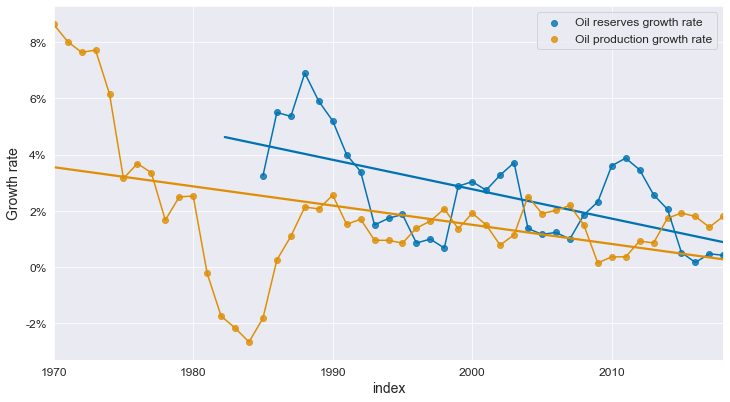

In [137]:
# Growth rate of the oil production and the discovery of reserves

frames = {}

val = ((oil_reserves_df.loc["Total World", :]-oil_reserves_df.loc["Total World", :].shift())/oil_reserves_df.loc["Total World", :].shift()).rolling(window=5).mean()
frames["Oil reserves growth rate"] = val.reset_index()

val = ((oil_prod_df.loc["Total World", :]-oil_prod_df.loc["Total World", :].shift())/oil_prod_df.loc["Total World", :].shift()).rolling(window=5).mean()
frames["Oil production growth rate"] = val.reset_index()

f, ax = plt.subplots(figsize=figsize)
max_length = 0
count = 0
for i, v in frames.items():
    x = list(frames[i].dropna()['index'].values)
    y = list(frames[i].dropna()["Total World"].values)
    sns.regplot(x='index', y="Total World", data=frames[i], label=i, ci=None)
    ax.plot(x, y, color=sns.color_palette()[count])
    count = count + 1

ax.set_ylabel("Growth rate")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))
ax.set_xlim(1970, 2018)
ax.legend()
ax.margins(0, None)
f.savefig(path_save+os.path.sep+"oil_growth_rate."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [138]:
oil_cons_df = get_df("Oil Consumption - Barrels")
oil_cons_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1682.379178,1712.654082,...,2208.566905,2358.319907,2436.267980,2375.662996,2397.618265,2442.130239,2401.252845,2448.268647,2447.995718,2447.133428
Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,629.457069,...,2021.321154,2039.738801,2065.143677,2082.999487,2034.163494,1959.694886,1939.288594,1950.178577,1883.227421,1811.535097
US,11522.187698,12100.347314,12566.880466,13404.548552,14152.985096,14709.910246,15222.758083,16380.813852,17317.932767,16630.648000,...,18771.397260,19180.128767,18882.073973,18490.215847,18961.126027,19105.613699,19530.909589,19687.232240,19957.723288,20455.668043
Total North America,12946.175087,13600.864592,14169.743492,15112.850664,15943.197330,16622.225987,17202.171181,18493.076253,19564.489751,18972.759151,...,23001.285320,23578.187475,23383.485630,22948.878330,23392.907786,23507.438823,23871.451028,24085.679464,24288.946427,24714.336568
Argentina,432.373936,447.270806,459.876977,468.994810,491.750733,447.785768,479.603260,478.584153,482.634685,482.874384,...,532.222891,593.686424,608.779290,635.630733,682.954995,673.055229,695.784510,686.338493,684.182068,647.656445


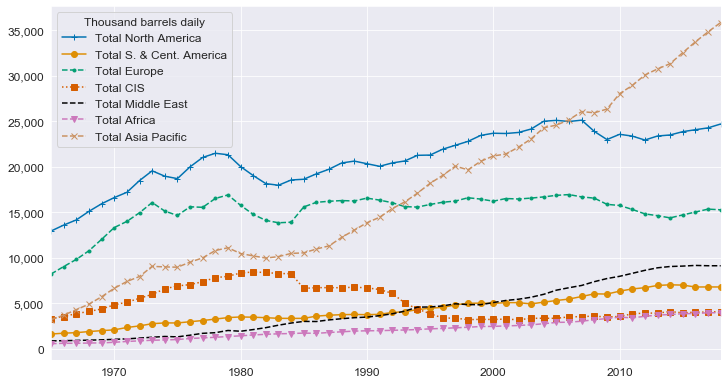

In [139]:
f, ax = plt.subplots(figsize=figsize)

(oil_cons_df.loc[total_idx, :]-oil_prod_df.loc[total_idx, :]).T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)
f.savefig(path_save+os.path.sep+"oil_import_export."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [140]:
oil_type_df = get_df("Oil - Regional Consumption ")
oil_type_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
Light distillates,5584.231589,5874.507452,6098.861534,6495.434836,6728.660931,6974.688822,7258.483041,7677.675027,8044.730110,7775.354247,...,10838.745036,10949.982640,10696.976259,10571.751945,10778.026954,10840.651225,11091.719844,11286.993190,11229.328025,11194.694780
of which: gasoline,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10517.580368,10555.933707,10319.808513,10225.481077,10388.235612,10478.723400,10745.536313,10946.030665,10933.867884,10898.540247
Middle distillates,3165.681917,3316.028493,3523.044028,3795.344589,3973.698631,4099.044794,4249.676083,4578.699262,4803.354603,4748.058520,...,6281.459351,6567.217775,6693.684139,6409.070926,6518.589417,6792.392097,6814.057752,6756.783655,6927.381320,7212.096051
of which: diesel/gasoil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4710.554263,4948.079245,5056.626464,4822.378396,4887.550893,5116.327553,5047.945425,4916.692937,5006.583983,5243.709631
of which: jet/kerosene,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1570.905088,1619.138530,1637.057675,1586.692530,1631.038524,1676.064544,1766.112328,1840.090718,1920.797337,1968.386420


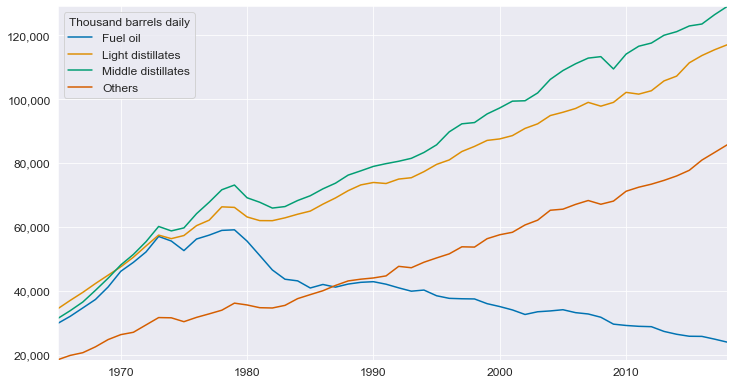

In [141]:
f, ax = plt.subplots(figsize=figsize)

products_idx = ["Light distillates", "Middle distillates", "Fuel oil", "Others"]
to_plot_df = oil_type_df.loc[products_idx, :].reset_index()

to_plot_df.groupby("Thousand barrels daily").sum().T.plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)

#fuel oil: marine, industry and electricity
#light distillates: petrol for transport (cars/planes)
#middle distillates: diesel (mainly) and heating fuel
#other: bitumes


In [142]:
oil_crude_prod_df = get_df("Oil Production - Crude Conds")
oil_crude_prod_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,
Canada,2015.422059,2055.568741,2207.008428,2342.370325,2413.159789,2372.394263,2504.754283,2606.887024,2581.140699,2576.375410,2724.389304,2899.545886,3130.682838,3358.448755,3609.989487,3678.820696,3677.885151,3976.663534,4302.376800
Mexico,3011.965098,3127.036422,3177.099014,3370.895969,3382.898305,3333.348655,3255.578679,3075.709821,2791.575975,2601.481209,2577.019421,2552.615388,2547.911755,2522.127105,2428.767527,2266.831419,2153.526155,1948.263173,1833.295114
US,5821.604000,5801.401000,5744.078000,5649.300000,5440.968000,5183.822000,5085.864000,5073.900000,4999.671000,5349.096000,5477.677000,5654.270000,6501.515000,7466.933000,8758.600000,9430.652000,8830.672000,9351.714000,10961.620000
Total North America,10848.991157,10984.006164,11128.185443,11362.566294,11237.026094,10889.564918,10846.196962,10756.496845,10372.387674,10526.952619,10779.085725,11106.431274,12180.109593,13347.508860,14797.357014,15376.304115,14662.083306,15276.640707,17097.291914
Argentina,775.868527,812.953364,801.663115,782.814212,733.449060,705.019619,697.917659,689.116081,679.440190,603.684576,589.333517,553.432294,549.389200,539.940373,532.129633,532.438815,510.543966,479.633023,489.493518


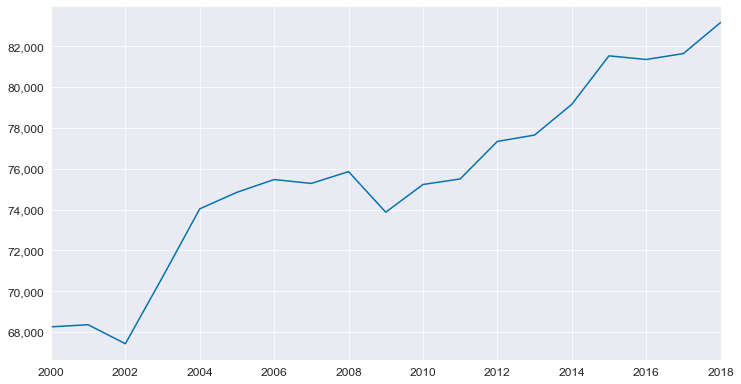

In [143]:
f, ax = plt.subplots(figsize=figsize)

oil_crude_prod_df.loc["Total World", :].T.plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)

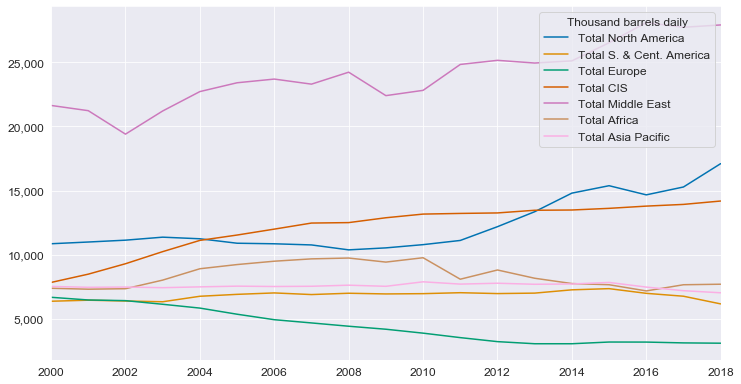

In [144]:
f, ax = plt.subplots(figsize=figsize)

oil_crude_prod_df.loc[total_idx, :].T.plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)

In [145]:
oil_NGL_prod_df = get_df("Oil Production - NGLs")
oil_NGL_prod_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Thousand barrels daily,,,,,,,,,,,,,,,,,,,
Canada,687.979843,672.389385,651.155673,661.100467,666.721657,668.501765,703.629927,683.302637,625.894599,626.022278,607.690496,615.276180,609.554839,641.962210,660.540415,709.314882,772.911346,821.526071,905.989595
Mexico,443.980511,441.091620,415.549313,423.803620,447.282024,432.272150,433.547051,402.820563,373.751737,377.013592,382.347059,387.697992,363.186225,352.625626,355.433352,319.709429,302.273343,275.886987,235.076029
US,1911.054645,1868.208219,1880.260274,1719.147945,1809.275956,1716.961644,1738.994521,1782.791781,1783.683060,1910.010959,2074.104110,2216.109589,2408.147541,2605.800000,3014.575342,3342.263014,3509.243169,3783.024658,4349.071233
Total North America,3043.014999,2981.689224,2946.965260,2804.052032,2923.279638,2817.735558,2876.171499,2868.914981,2783.329396,2913.046830,3064.141664,3219.083761,3380.888606,3600.387836,4030.549110,4371.287324,4584.427858,4880.437715,5490.136857
Argentina,72.509150,108.358338,105.958782,130.108376,140.451914,137.458796,150.601003,124.813600,122.890578,126.010278,122.506574,113.804105,107.343872,104.907206,105.890164,114.408205,99.560111,110.915924,102.314553


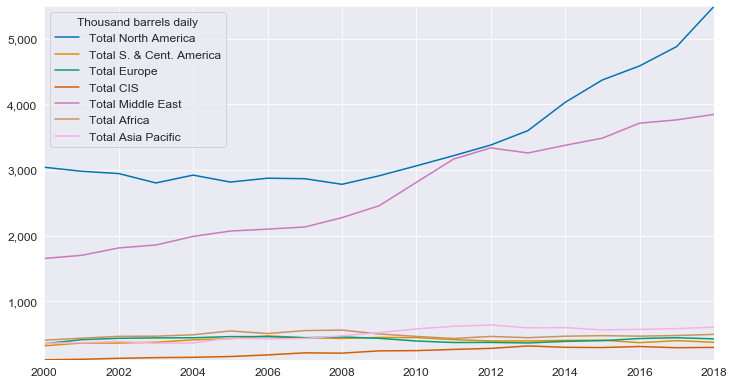

In [146]:
f, ax = plt.subplots(figsize=figsize)

oil_NGL_prod_df.loc[total_idx, :].T.plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)

## Electricity

In [147]:
elec_gen_df = get_df("Electricity Generation ")
elec_gen_df.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Terawatt-hours,,,,,,,,,,,,,,,,,,,,,
Canada,459.016400,468.584033,496.397700,506.015765,498.092587,480.593242,506.994858,518.626812,530.232161,553.054844,...,614.041446,606.921322,638.278521,636.546087,662.495952,660.460683,663.676701,663.852211,662.731411,654.350156
Mexico,96.207532,99.589895,106.165401,112.230823,120.047161,117.591543,128.571171,132.275665,134.642519,146.127562,...,267.753583,275.567402,292.143242,296.395954,297.117849,303.315833,310.349642,320.344722,329.085355,332.140023
US,2657.150071,2676.113155,2772.205266,2914.445815,3155.449679,3232.779649,3270.724402,3284.389935,3404.677873,3458.526081,...,4206.493361,4394.250985,4363.377155,4310.569202,4330.292888,4363.326407,4348.669440,4347.910814,4302.535126,4460.771285
Total North America,3212.374003,3244.287083,3374.768367,3532.692403,3773.589427,3830.964434,3906.290432,3935.292412,4069.552553,4157.708487,...,5088.288389,5276.739710,5293.798918,5243.511243,5289.906688,5327.102923,5322.695784,5332.107747,5294.351892,5447.261464
Argentina,45.303728,49.022193,52.115279,52.499520,50.862813,51.004894,53.854270,56.107097,61.868779,65.622035,...,122.326015,125.992053,129.483308,136.033625,139.441423,138.551146,145.421556,147.192821,145.618454,146.609407


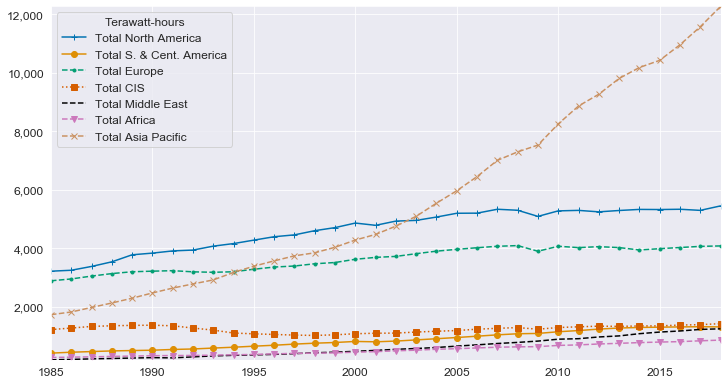

In [148]:
f, ax = plt.subplots(figsize=figsize)

elec_gen_df.loc[total_idx, :].T.plot(ax=ax, style=['+-','o-','.--','s:', 'k--', 'v--', 'x--'])
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, 0)

## Carbon Dioxide Emissions

In [149]:
co2_df = get_df("Carbon Dioxide Emissions")
co2_df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes of carbon dioxide,,,,,,,,,,,,,,,,,,,,,
Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,392.532093,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,120.841304,...,433.023325,442.415847,465.416188,473.698587,472.509510,459.159973,462.968167,468.539460,476.846262,462.477817
US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,4596.370255,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
Total North America,3802.064021,4011.580252,4124.166130,4373.664194,4568.442077,4726.128891,4780.909564,5031.405347,5258.229048,5109.743651,...,6199.175066,6434.733952,6360.138723,6133.960875,6274.900958,6310.862789,6161.228709,6058.156832,6040.739115,6157.935105
Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,91.653571,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732


In [150]:
def get_to_merge_df(df, name):
    temp_df = df.loc["Total World", :].T.reset_index()
    temp_df["index"]=temp_df["index"].astype(int)
    temp_df.columns =["index", name]
    return temp_df

In [151]:
temp_df = get_to_merge_df(elec_gen_df, "Electricity [TWh]")
merged_df = pd.merge(gdp_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

temp_df = get_to_merge_df(prim_cons_df, "Primary energy consumption")
merged_df = pd.merge(merged_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

temp_df = get_to_merge_df(oil_cons_df, "Oil consumption")
merged_df = pd.merge(merged_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

temp_df = get_to_merge_df(oil_prod_df, "Oil production")
merged_df = pd.merge(merged_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

temp_df = get_to_merge_df(coal_cons_df, "Coal consumption")
merged_df = pd.merge(merged_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

temp_df = get_to_merge_df(co2_df, "CO2")
merged_df = pd.merge(merged_df, temp_df, left_index=True, right_on="index", how="left")
merged_df.set_index("index", drop=True, inplace=True)

merged_df = pd.merge(merged_df, oil_price, left_index=True, right_index=True, how="left")


merged_df = pd.merge(merged_df, pop_df, left_index=True, right_index=True, how="left")

merged_df.head()

,GDP,Electricity [TWh],Primary energy consumption,Oil consumption,Oil production,Coal consumption,CO2,$ money of the day,$ 2018,Population
index,,,,,,,,,,
1960,1.37e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.9,16.092694,3.03225e+09
1961,1.43e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.8,15.096553,3.07341e+09
1962,1.53e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.8,14.933836,3.12652e+09
1963,1.65e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.8,14.757558,3.19178e+09
1964,1.81e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.8,14.554162,3.25744e+09


In [152]:
merged_df["Electricity/GDP"] = merged_df["Electricity [TWh]"]/merged_df["GDP"]
merged_df["Electricity/GDP"] = merged_df["Electricity/GDP"]/merged_df["Electricity/GDP"].max()
merged_df["Oil/GDP"] = merged_df["Oil consumption"]/merged_df["GDP"]
merged_df["Oil/GDP"] = merged_df["Oil/GDP"]/merged_df["Oil/GDP"].max()
merged_df["Primary energy/GDP"] = merged_df["Primary energy consumption"]/merged_df["GDP"]
# merged_df["Primary energy/GDP"] = merged_df["Primary energy/GDP"]/merged_df["Primary energy/GDP"].max()
merged_df["CO2/GDP"] = merged_df["CO2"]/merged_df["GDP"]
merged_df["CO2/GDP"] = merged_df["CO2/GDP"]/merged_df["CO2/GDP"].max()

merged_df["CO2/Energy"] = merged_df["CO2"]/merged_df["Primary energy consumption"]
merged_df["CO2/Energy"] = merged_df["CO2/Energy"]/merged_df["CO2/Energy"].max()

merged_df["Primary energy/Population"] = merged_df["Primary energy consumption"]/merged_df["Population"]

merged_df["GDP/Population"] = merged_df["GDP"]/merged_df["Population"]
merged_df["GDP/Population"] = merged_df["GDP/Population"]/merged_df["GDP/Population"].max()

merged_df["CO2/Population"] = merged_df["CO2"]*1000000/merged_df["Population"]
merged_df["Year"] = merged_df.index

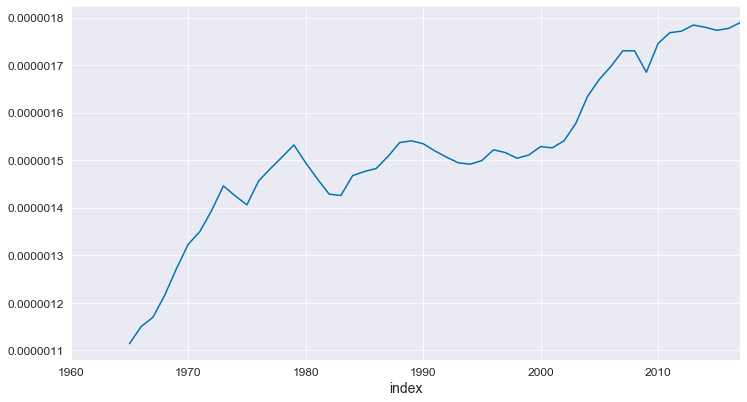

In [153]:
f, ax = plt.subplots(figsize=figsize)
# merged_df["CO2"].plot(ax=ax)
merged_df["Primary energy/Population"].plot(ax=ax)

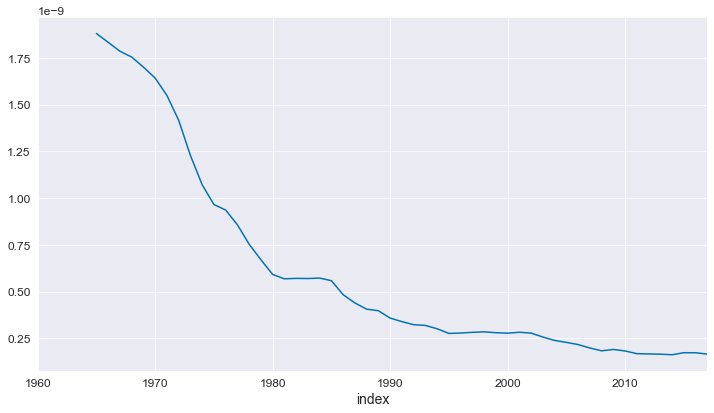

In [154]:
f, ax = plt.subplots(figsize=figsize)
# merged_df["CO2"].plot(ax=ax)
merged_df["Primary energy/GDP"].plot(ax=ax)

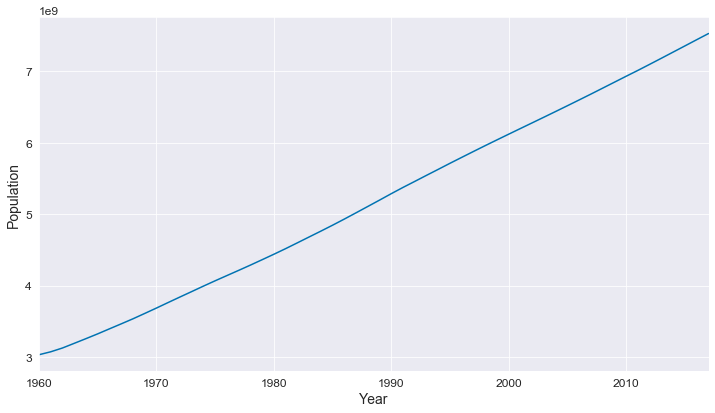

In [155]:
f, ax = plt.subplots(figsize=figsize)
merged_df["Population"].plot(ax=ax)
ax.set_ylabel("Population")
ax.set_xlabel("Year")
f.savefig(path_save+os.path.sep+"Population."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

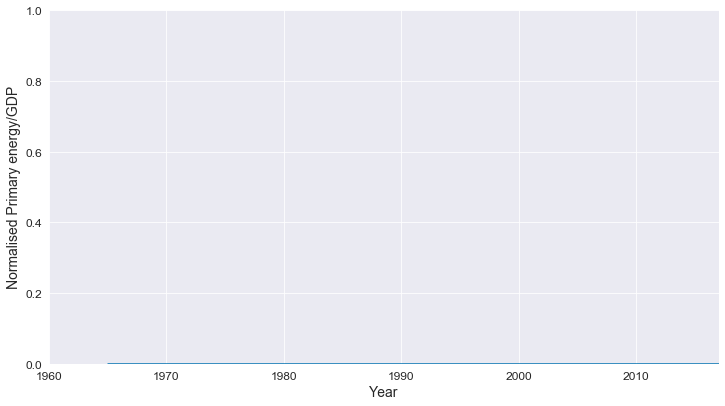

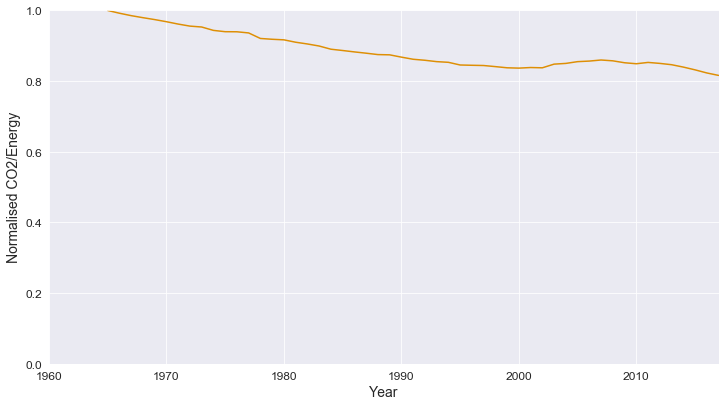

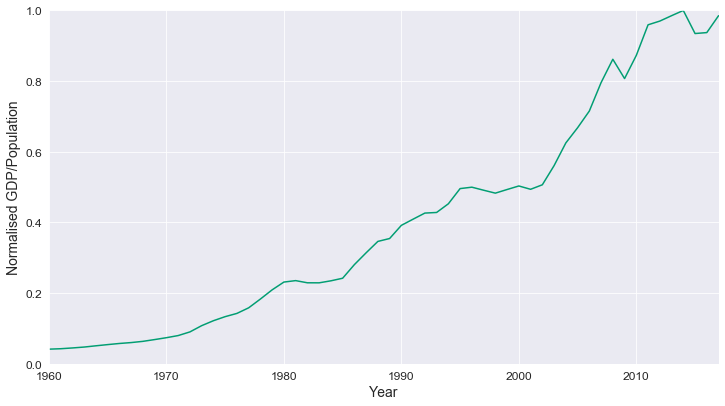

In [156]:
## Carbon intensity of energy
for ii,c in enumerate(["Primary energy/GDP", "CO2/Energy", "GDP/Population"]):
    f, ax = plt.subplots(figsize=figsize)
    merged_df[c].plot(ax=ax, color=sns.color_palette()[ii])
    ax.set_ylim(0, 1)
    ax.set_ylabel("Normalised "+c)
    ax.set_xlabel("Year")
    f.savefig(path_save+os.path.sep+c.replace("/", " by ")+"."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [181]:
merged_df

,GDP,Electricity [TWh],Primary energy consumption,Oil consumption,Oil production,Coal consumption,CO2,$ money of the day,$ 2018,Population,Electricity/GDP,Oil/GDP,Primary energy/GDP,CO2/GDP,CO2/Energy,Primary energy/Population,GDP/Population,CO2/Population,Year
index,,,,,,,,,,,,,,,,,,,
1960,1.37e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.900000,16.092694,3.03225e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0414267,NaN,1960
1961,1.43e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,15.096553,3.07341e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0426618,NaN,1961
1962,1.53e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,14.933836,3.12652e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0448698,NaN,1962
1963,1.65e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,14.757558,3.19178e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0473997,NaN,1963
1964,1.81e+12,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,14.554162,3.25744e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.0509479,NaN,1964
1965,1.97e+12,NaN,3703.378469,30729.637819,11.604028,1388.815587,11193.939344,1.800000,14.310086,3.32454e+09,NaN,0.995739,1.87989e-09,1,1.000000,1.11395e-06,0.0543324,3.36707,1965
1966,2.13e+12,NaN,3904.298745,33097.768403,12.614721,1404.296670,11708.869471,1.800000,13.921372,3.39481e+09,NaN,0.991912,1.833e-09,0.967428,0.992172,1.15008e-06,0.0575292,3.44905,1966
1967,2.27e+12,NaN,4052.136402,35462.172923,13.542818,1381.868845,12068.147935,1.800000,13.528139,3.46447e+09,NaN,0.997226,1.78508e-09,0.935617,0.985307,1.16963e-06,0.0600777,3.4834,1967
1968,2.45e+12,NaN,4297.991782,38380.607118,14.752661,1402.629621,12725.796599,1.800000,12.985747,3.5351e+09,NaN,1,1.75428e-09,0.914118,0.979568,1.2158e-06,0.063546,3.59984,1968


Text(0.5, 0, 'GDP')

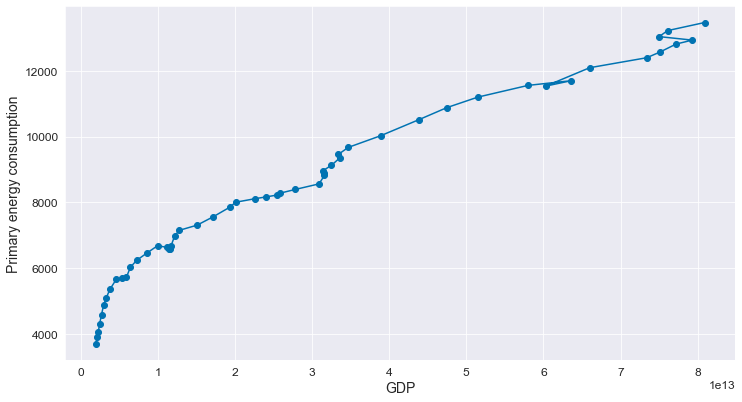

In [180]:
f, ax = plt.subplots(figsize=figsize)
x_val = merged_df["GDP"]
y_val = merged_df["Primary energy consumption"]

plt.scatter(x_val, y_val)
ax.plot(x_val, y_val)

ax.set_ylabel("Primary energy consumption")
ax.set_xlabel("GDP")

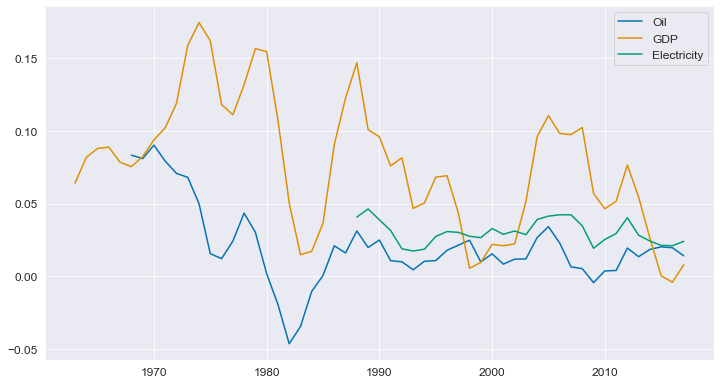

In [158]:
f, ax = plt.subplots(figsize=figsize)
y_val = ((merged_df["Oil production"]-merged_df["Oil production"].shift())/merged_df["Oil production"].shift()).rolling(window=3).mean().values
x_val = merged_df.index
plt.plot(x_val, y_val, label="Oil")

# y_val = ((merged_df["Oil consumption"]-merged_df["Oil consumption"].shift())/merged_df["Oil consumption"].shift()).rolling(window=3).mean().values

# plt.plot(x_val, y_val)

y_val = ((merged_df["GDP"]-merged_df["GDP"].shift())/merged_df["GDP"].shift()).rolling(window=3).mean().values
plt.plot(x_val, y_val, label="GDP")


y_val = ((merged_df["Electricity [TWh]"]-merged_df["Electricity [TWh]"].shift())/merged_df["Electricity [TWh]"].shift()).rolling(window=3).mean().values
plt.plot(x_val, y_val, label="Electricity")

ax.legend()

Text(0.5, 0, 'Year')

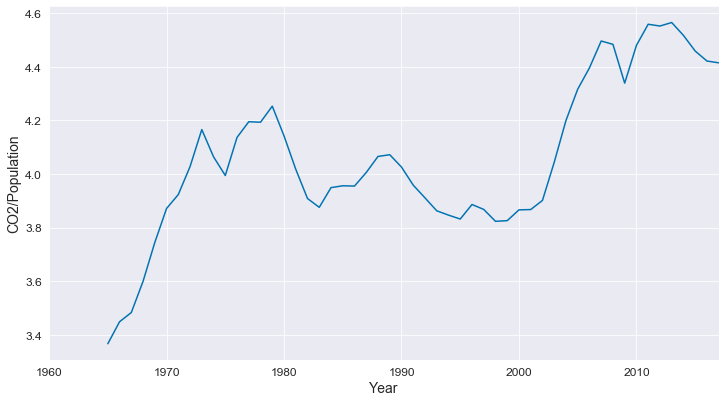

In [159]:
f, ax = plt.subplots(figsize=figsize)
merged_df["CO2/Population"].plot(ax=ax)
x_val = merged_df.index
# plt.scatter(x_val, y_val)
# ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel("CO2/Population")
ax.set_xlabel("Year")



In [160]:
## gdp vs energy consumption

Text(0.5, 0, 'GDP')

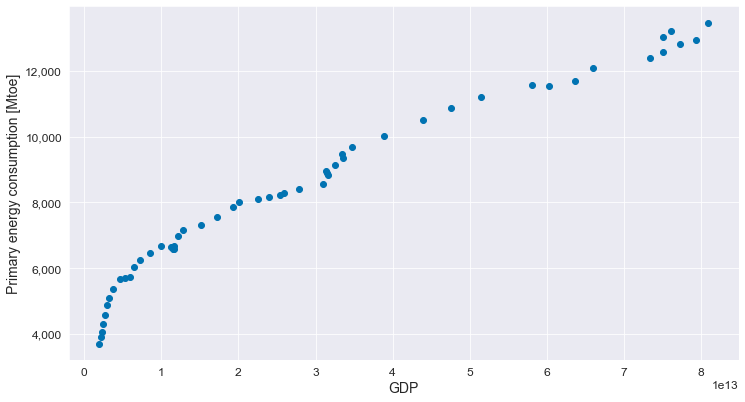

In [161]:
f, ax = plt.subplots(figsize=figsize)
y_val = merged_df["Primary energy consumption"].values
x_val = merged_df["GDP"].values
plt.scatter(x_val, y_val)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel("Primary energy consumption [Mtoe]")
ax.set_xlabel("GDP")

In [162]:
changed_df = merged_df.copy()

In [163]:
for c in changed_df.columns:
    if c is not "Year":
        changed_df[c] = (changed_df[c] - changed_df.loc[1990, c])/changed_df.loc[1990, c]

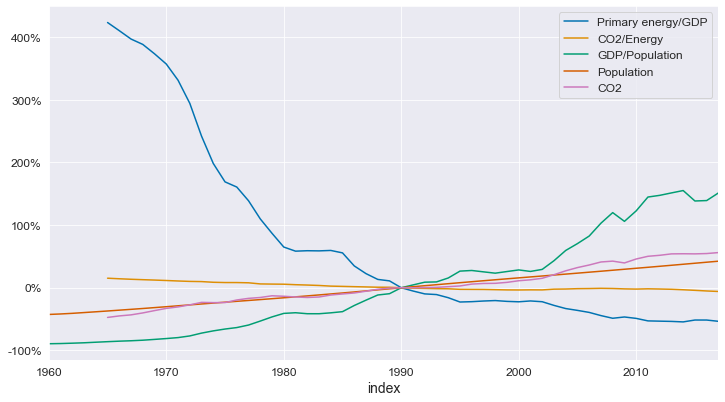

In [164]:
f, ax = plt.subplots(figsize=figsize)
cols = ["Primary energy/GDP", "CO2/Energy", "GDP/Population", "Population", "CO2"]
changed_df[cols].plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))

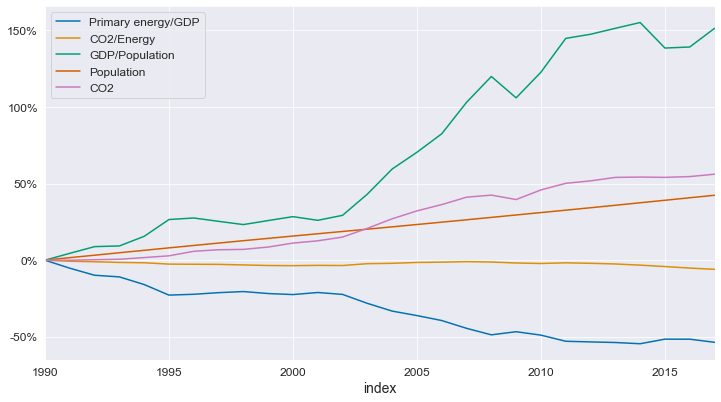

In [165]:
f, ax = plt.subplots(figsize=figsize)
changed_df.loc[changed_df["Year"]>=1990, cols].plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f}%'.format(x*100)))

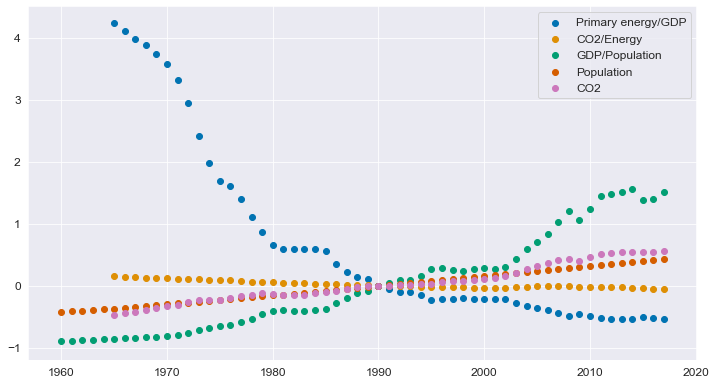

In [166]:
f, ax = plt.subplots(figsize=figsize)
x_val = changed_df.index.values
# y_val = changed_df["Electricity/GDP"].values
# plt.scatter(x_val, y_val, label="Electricity/GDP")
# y_val = changed_df["Oil/GDP"].values
# plt.scatter(x_val, y_val, label="Oil/GDP")
y_val = changed_df["Primary energy/GDP"].values
plt.scatter(x_val, y_val, label="Primary energy/GDP")
# y_val = changed_df["CO2/GDP"].values
# plt.scatter(x_val, y_val, label="CO2/GDP")

y_val = changed_df["CO2/Energy"].values
plt.scatter(x_val, y_val, label="CO2/Energy")

y_val = changed_df["GDP/Population"].values
plt.scatter(x_val, y_val, label="GDP/Population")

y_val = changed_df["Population"].values
plt.scatter(x_val, y_val, label="Population")

y_val = changed_df["CO2"].values
plt.scatter(x_val, y_val, label="CO2")

ax.legend()

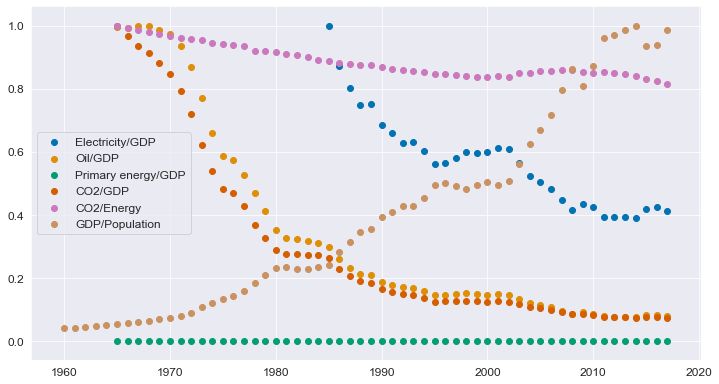

In [167]:
f, ax = plt.subplots(figsize=figsize)
x_val = merged_df.index.values
y_val = merged_df["Electricity/GDP"].values
plt.scatter(x_val, y_val, label="Electricity/GDP")
y_val = merged_df["Oil/GDP"].values
plt.scatter(x_val, y_val, label="Oil/GDP")
y_val = merged_df["Primary energy/GDP"].values
plt.scatter(x_val, y_val, label="Primary energy/GDP")
y_val = merged_df["CO2/GDP"].values
plt.scatter(x_val, y_val, label="CO2/GDP")

y_val = merged_df["CO2/Energy"].values
plt.scatter(x_val, y_val, label="CO2/Energy")

y_val = merged_df["GDP/Population"].values
plt.scatter(x_val, y_val, label="GDP/Population")

ax.legend()
# sns.lmplot(x="GDP", y="Total World", data=gdp_1960_2017, ax=ax)